In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/UpdatedResumeDataSet.csv')
data.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
data['Category'].nunique()

25

In [8]:
categories = data['Category'].value_counts().reset_index()
categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


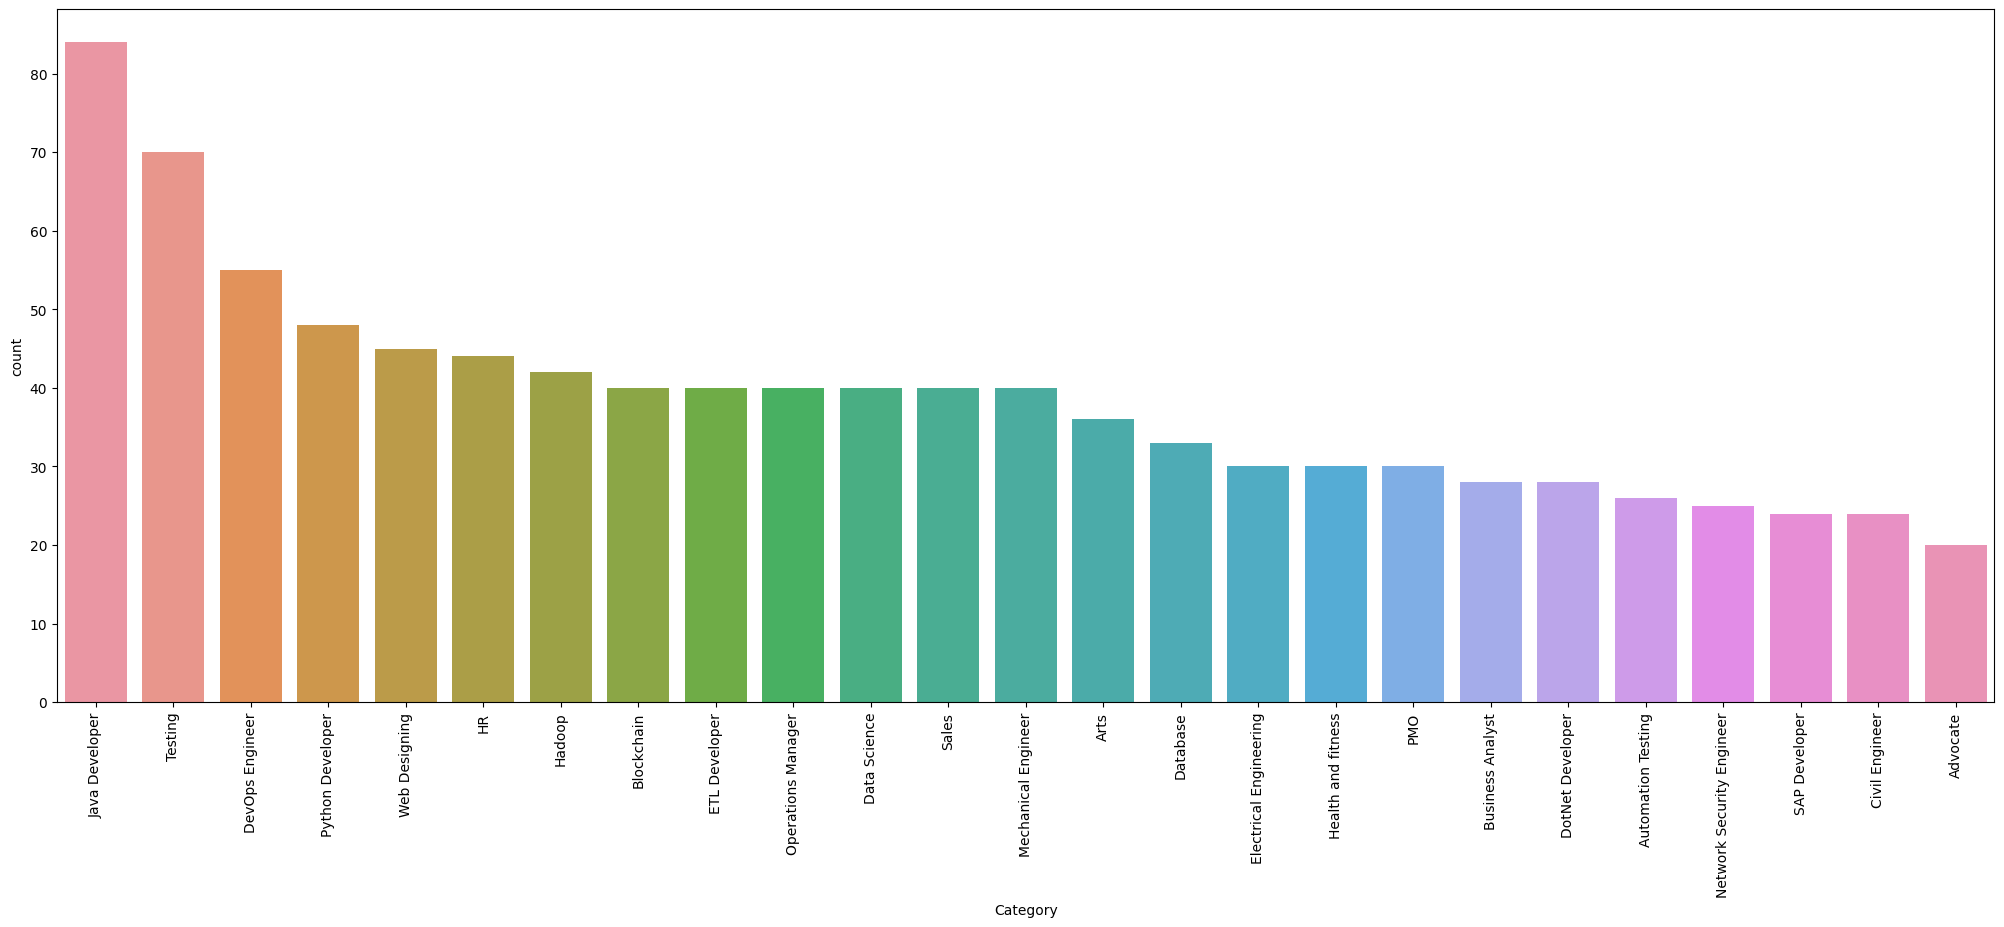

In [9]:
plt.figure(figsize=(25,9))
plt.xticks(rotation=90)
sns.countplot(x ='Category', data= data, order= data['Category'].value_counts().index)
plt.show()

In [10]:
data1 = data
data1['cleaned_resume']= ""

In [11]:
le = LabelEncoder()
data1['Category']= le.fit_transform(data1['Category'])
data1

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,
2,6,"Areas of Interest Deep Learning, Control Syste...",
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,
958,23,â Willingness to accept the challenges. â ...,
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [12]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [13]:
data1['cleaned_resume'] = data1['Resume'].apply(lambda x: clean_function(x))
data1.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [17]:
import string
SetOfStopWords= set(stopwords.words('english')+['``',"''"])
totalWords= []
Sentences = data1['Resume'].values
cleanedSentences= ""
# Sentences

for i in Sentences:
    cleanedText= clean_function(i)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
          totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [18]:
mostcommon = wordfreqdist.most_common(30)
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

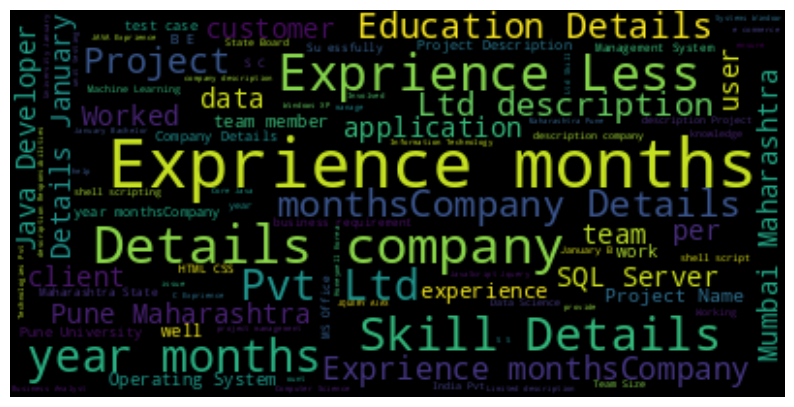

In [19]:
WordCloud= WordCloud().generate(cleanedSentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
Features= data1['cleaned_resume'].values
Target= data1['Category'].values
data1.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [21]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(Features)
WordFeatures = word_vectorizer.transform(Features)
print(WordFeatures)
WordFeatures.shape

  (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 336)	0.13437601229264157
  (961, 317)	0.06693311287776045
  (961, 315)	0.08639977563211801
  (961, 272)	0.025466251941105137
  (961, 258)	0.082314549875185
  (961, 243)	0.10857982774459495
  

(962, 1500)

In [22]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.95
Accuracy of KNeighbors Classifier on test set: 0.94


In [24]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]

In [25]:
job_description = """
Skills Required:
Python, Java

• Hands on years of working experience with ETL integration, Core JAVA, Spring Boot and APIs

• Good knowledge of DB2 or Azure SQL server (experience developing SQL queries)

• Understanding of File Transfer protocols and processes ie. FTP, SFTP, PGP Encryption

• Understanding mainframe integration for ETL processing

• Technical working experience with UNIX shell scripting

• Knowledge and understanding of Web Services

• Experience in developing ETL processes (preferably Talend, iWay, DataStage)

• Experience in writing/creating/updating technical documents

• Experience in batch job/process scheduling

• Familiarity with data integration and data streaming, WebSphere MQ and Communication Networks

• Familiarity with event driven programming concepts

• Exposure to Data Modelling and Data Architecture


Roles & Responsibilities:


• Act as an expert technical resource for problem analysis and solution implementation

• Work closely with Delivery and Technical Architecture teams, Product Owners and Technical Platform teams to design and develop high quality solutions supporting enterprise architecture and business process improvements that support our business and technical strategies

• Deal effectively with external Vendors, Business Partners, internal Stakeholders and Management

• Implement new systems or enhancements including, reviewing programs written by team members, establishing and supporting system test procedures, developing implementation plan, developing the required program and system documentation and ensuring all functionality has been delivered as required

• Provide post implementation support and training to the Production Support staff on the production processing functionality

• Support other development areas providing technical expertise, guidance, advice and knowledge transfer to staff and more junior Developers

• Coordinate and accommodate with a geographically dispersed team

• Pager rotation mandatory during critical processing times
"""

In [26]:
import plotly.express as px
job_predictor = JobPredictor()
resume_position = job_predictor.predict(job_description)

chart_data = pd.DataFrame({
    "position": [cl for cl in job_predictor.le.classes_],
    "match": job_predictor.predict_proba(job_description)
})

fig = px.bar(chart_data, x="position", y="match", title=f'Job Description matched to: {resume_position}')
fig.show()

In [27]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=f189a24cbae345c646aa5c4a15ac663d67bc3a8fae49609a49704b5c91f7bcfd
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from docx import Document
from nltk.tokenize import WhitespaceTokenizer
import plotly.graph_objects as go
import plotly.express as px

text_tokenizer= WhitespaceTokenizer()
remove_characters= str.maketrans("", "", "±§!@#$%^&*()-_=+[]}{;'\:,./<>?|")
cv = CountVectorizer()
resume_docx = ""
document = Document("/content/drive/MyDrive/datasets/Abiral_Pandey_Fullstack_Java.docx")
indx=0
for para in document.paragraphs:
  indx+=1
  if(len(para.text)>0):
    resume_docx += para.text

text_docx= [resume_docx, job_description]

words_docx_list = text_tokenizer.tokenize(resume_docx)

words_docx_list=[s.translate(remove_characters) for s in words_docx_list]

count_docx = cv.fit_transform(text_docx)

similarity_score_docx = cosine_similarity(count_docx)
match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
f'Match percentage with the Job description: {match_percentage_docx}'

'Match percentage with the Job description: 63.06'

In [29]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = match_percentage_docx,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Match with Job Description"}))

fig.show()